<a href="https://colab.research.google.com/github/brunopdrocha/ml_ibmec/blob/main/001_Regressao_Predicao_Cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predizer consumo de Cerveja

Com o intuito de otimizar recursos na compra de estoque de cerveja, a rede de cervejarias <b>"Bricklayer's Shin"</b> quer melhorar o entendimento sobre o consumo de cerveja em algumas localidades da cidade do Rio de Janeiro.
<hr>

A rede <b>"Bricklayer's Shin"</b> encontrou uma base de dados que contém algumas variáveis que podem explicar o consumo em uma determinada região universitária.

Para essa tarfefa, inicialmente iremos procurar por correlações liniares, caso sejam encontradas, pretende-se utilizar um modelo de apendizado de máquina (Machine Learning) de Regressão Linear para tentar prever o consumo de cerveja.
<hr>

Os dados foram coletados numa área universitária, onde existem algumas festas com jovens adultos.
<hr>
Neste dataset, os dados estão organizados da seguinte forma:

<ul>
    <li><b>data</b> - Data em que a pesquisa foi feita</li>
    <li><b>temp_med</b> - Temperatura Média do dia (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima do dia (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima do dia (°C)</li>
    <li><b>precip</b> - Precipitação (mm) (Quantidade de chuva) </li>
    <li><b>fs</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>
<hr/>
<ul>
    <li>Variáveis explicativas: data, temp_med, temp_min, temp_max, precip, fs</li>
    <li>Variável Dependente: consumo</li>
</ul>



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando os dados do meu Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alvaroriz/datascience_datasets/main/Consumo_cerveja.csv')
df

,data,temp_med,temp_min,temp_max,precip,fs,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [ ]:
df.shape

(365, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   data      365 non-null    object 
 1   temp_med  365 non-null    float64
 2   temp_min  365 non-null    float64
 3   temp_max  365 non-null    float64
 4   precip    365 non-null    float64
 5   fs        365 non-null    int64  
 6   consumo   365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


## Análise Exploratória

In [ ]:
df.describe().round(2)

,temp_med,temp_min,temp_max,precip,fs,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [ ]:
df.drop('data', axis=1, inplace=True)

### Matriz de Correlação

In [ ]:
df.corr().round(2)

,temp_med,temp_min,temp_max,precip,fs,consumo
temp_med,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
precip,0.02,0.10,-0.05,1.00,0.00,-0.19
fs,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'temp_med'),
  Text(1.5, 0, 'temp_min'),
  Text(2.5, 0, 'temp_max'),
  Text(3.5, 0, 'precip'),
  Text(4.5, 0, 'fs'),
  Text(5.5, 0, 'consumo')])

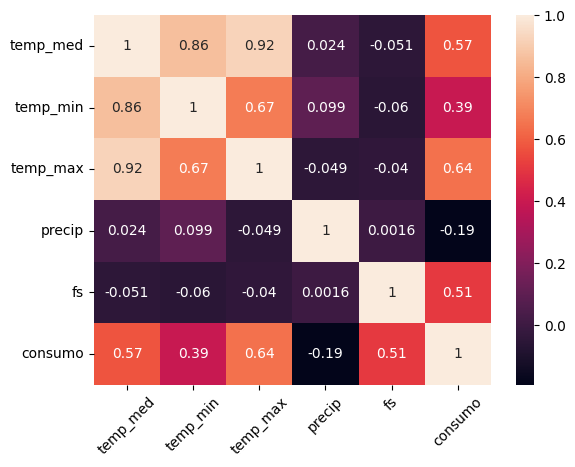

In [ ]:
# aqui faca um plot de um mapa de calor seabonr
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45)

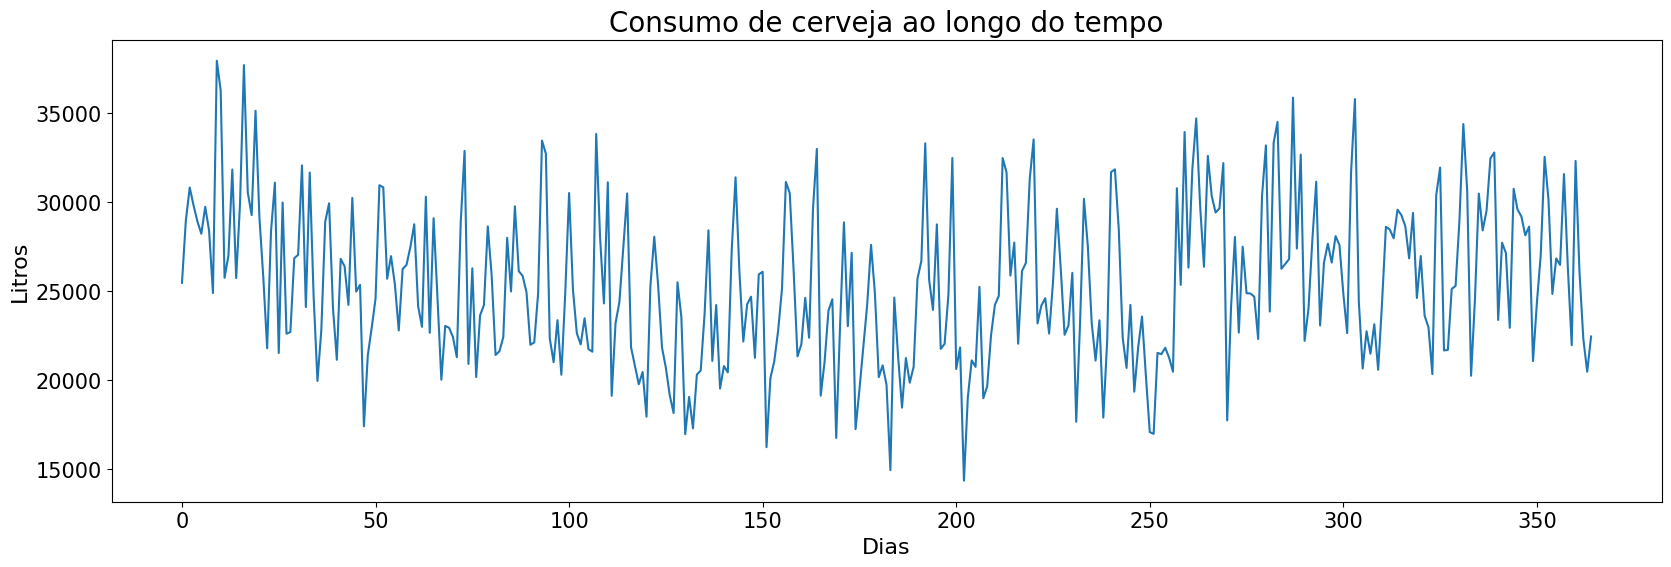

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de cerveja ao longo do tempo', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)

ax = df['consumo'].plot(fontsize=15)

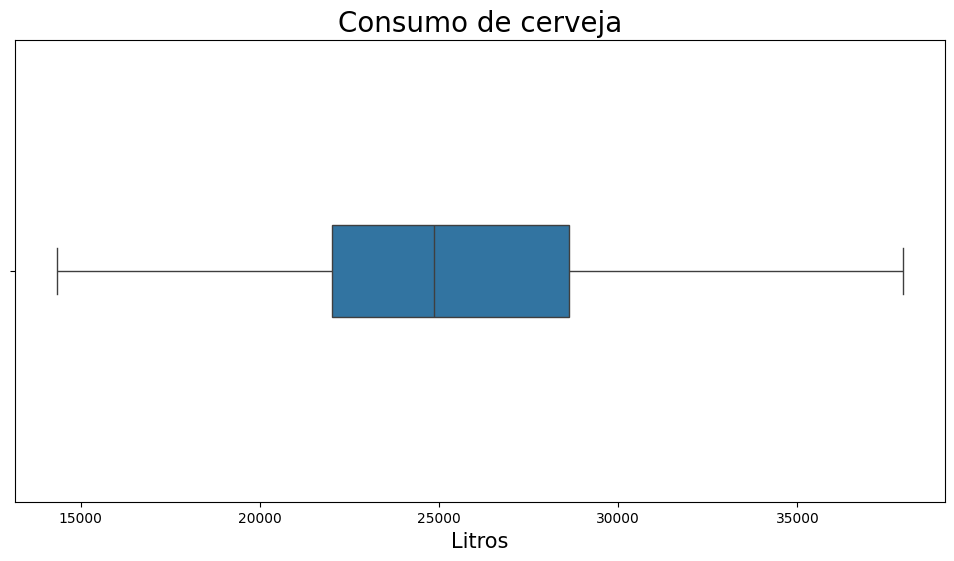

In [ ]:
ax = sns.boxplot(data=df['consumo'], orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_xlabel('Litros', fontsize=15)
ax.figure.set_size_inches(12,6)

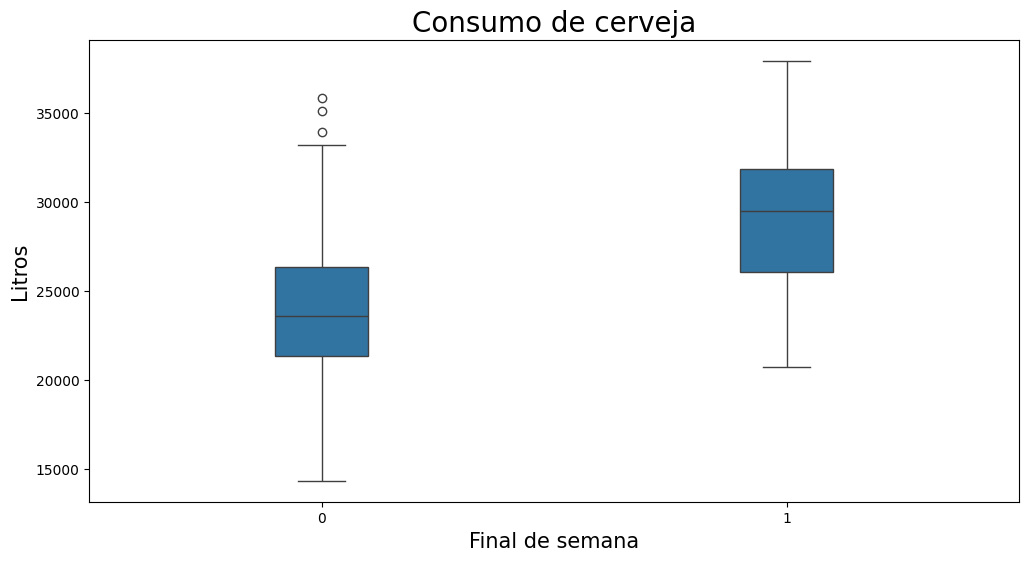

In [ ]:
ax = sns.boxplot(y='consumo', x='fs', data=df, orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=15)
ax.set_xlabel('Final de semana', fontsize=15)
ax.figure.set_size_inches(12,6)

<ipython-input-78-e82172e5e63d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['consumo'],bins=10)


<Axes: title={'center': 'Consumo de cerveja ao longo do tempo'}, xlabel='consumo', ylabel='Litros'>

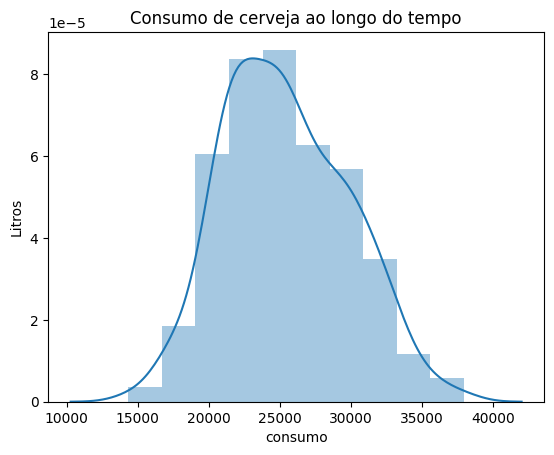

In [ ]:
plt.title('Consumo de cerveja ao longo do tempo')
plt.xlabel('Dias')
plt.ylabel('Litros')
sns.distplot(df['consumo'],bins=10)

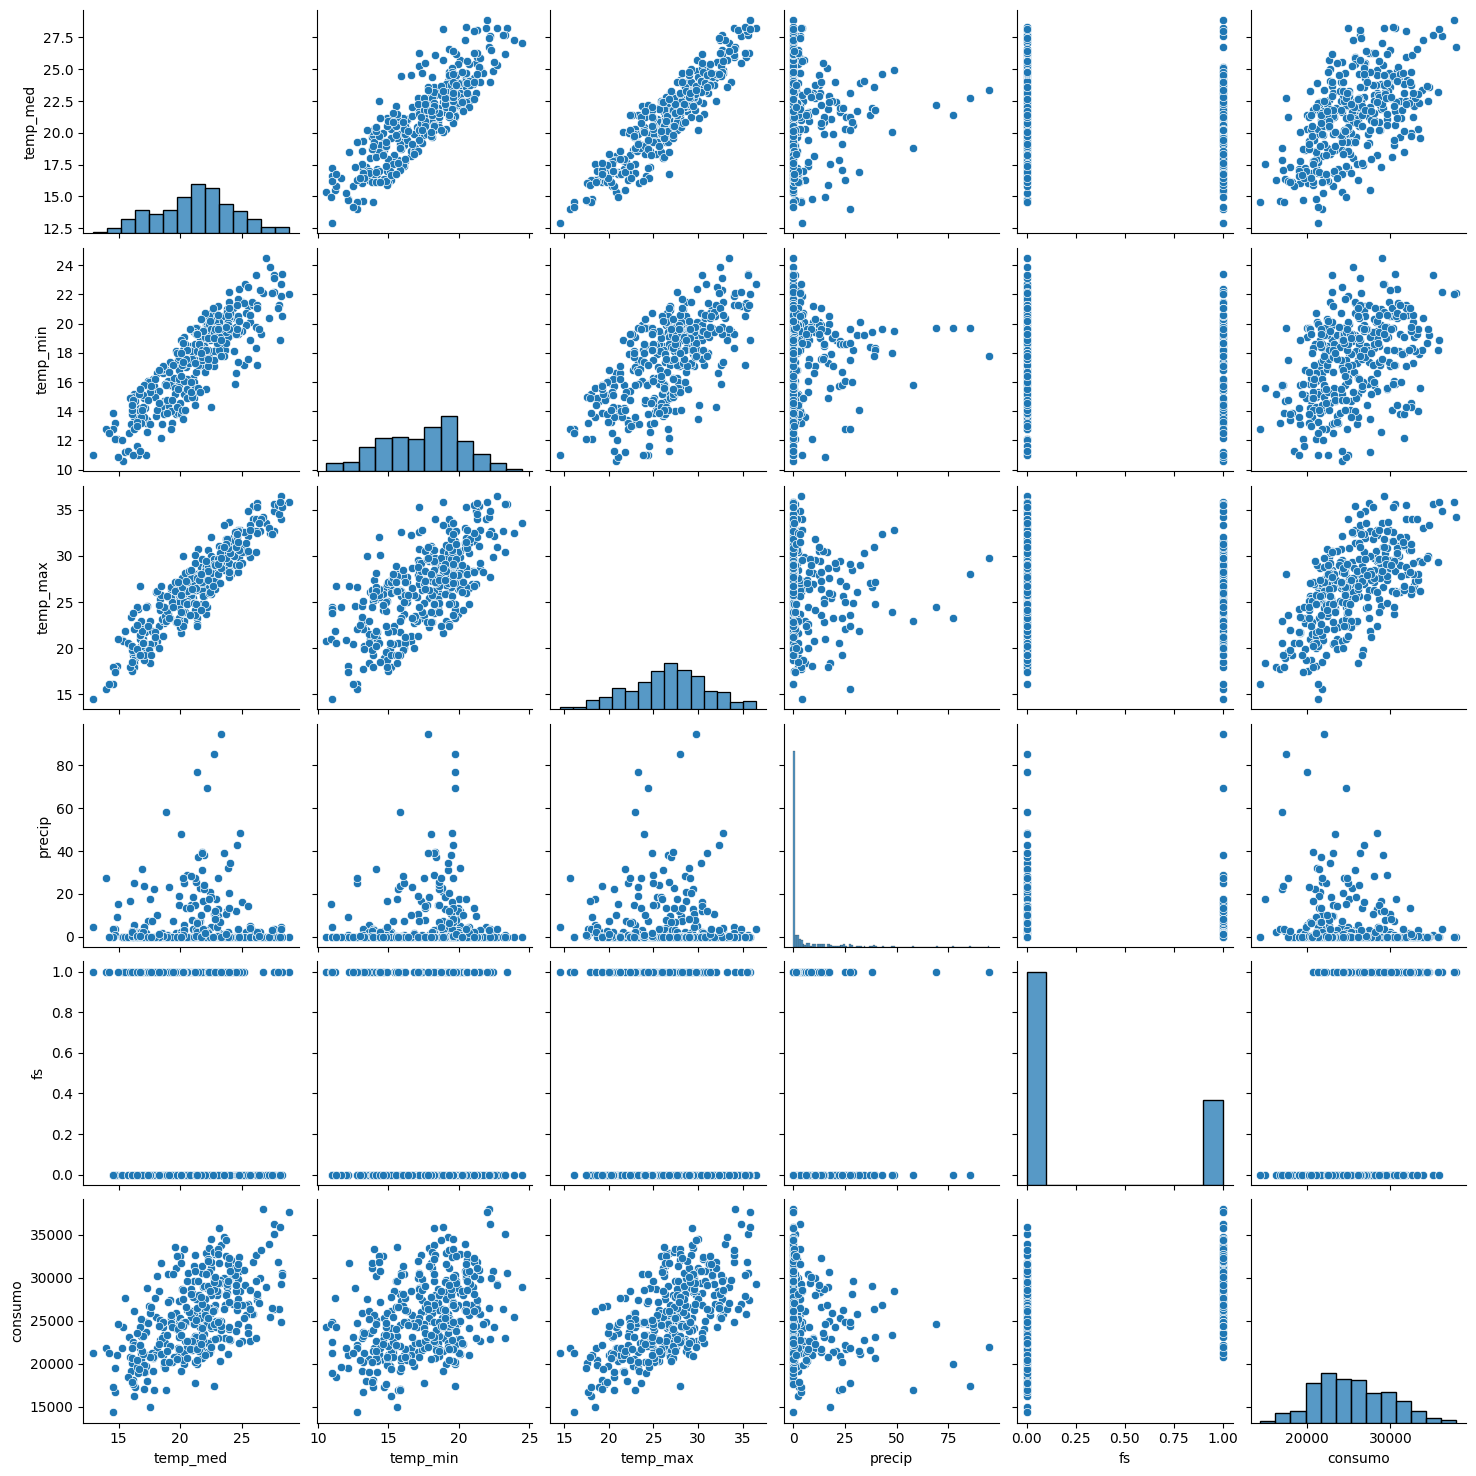

In [ ]:
sns.pairplot(df)


Text(0.5, 1.05, 'Consumo de cerveja')

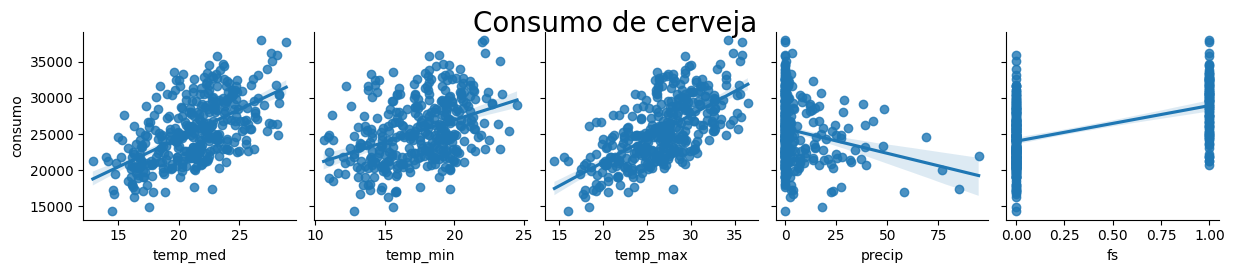

In [ ]:
ax = sns.pairplot(df, y_vars='consumo', x_vars=['temp_med', 'temp_min', 'temp_max', 'precip', 'fs'],kind='reg')
ax.fig.suptitle('Consumo de cerveja', fontsize=20,y=1.05)

### Estiamando um modelo de Regressão Linear com o uso do Scikit-Learn


In [ ]:
y= df['consumo']
y

,consumo
0,25461
1,28972
2,30814
3,29799
4,28900
...,...
360,32307
361,26095
362,22309
363,20467


In [ ]:
X = df[['temp_max','precip','fs']]
X

,temp_max,precip,fs
0,32.5,0.0,0
1,33.5,0.0,0
2,29.9,0.0,1
3,28.6,1.2,1
4,28.3,0.0,0
...,...,...,...
360,28.2,13.6,1
361,26.7,0.0,0
362,24.1,10.3,0
363,22.4,6.3,0


### Separando nossos dados entre treino e teste ,com Scikit-Learn.train_test_split

In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(255, 3)

In [ ]:
X_test.shape

(110, 3)

## Treinando Modelo

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo = LinearRegression()


In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

### Validando o meu modelo com r quadrado médio

In [ ]:
from sklearn import metrics

modelo.score(X_train, y_train).round(2)

0.71

In [ ]:
print('R² de TREINO:', modelo.score(X_train, y_train).round(2))

R² de TREINO: 0.71


# Fazendo minhas previsões


In [ ]:
y_predicao = modelo.predict(X_test)

In [ ]:
print('R² de TESTE:', modelo.score(X_test, y_test).round(2))

R² de TESTE: 0.75


# Previsão pontual

In [ ]:
temp_max = 32
chuva = 0
fim_de_semana = 1

dados_entrada = np.array([[temp_max, chuva, fim_de_semana]])
modelo.predict(dados_entrada)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33091.94581533])